In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Case Air Plan Data.csv',parse_dates=['connect_date','end_date'])
df

,customer_id,gender,age,postalcode,region,connect_date,end_date,dropped_calls,pay method,tariff,handGAMAet,churn
0,AP173350,Male,15,3590,R2,2014-01-01,2016-04-14,0,Prepaid,CAT 200,X90,Churned
1,AP417050,Male,33,8048,R4,2014-02-01,2016-12-20,15,Prepaid,Play 300,GAMA50,Churned
2,AP398340,Female,17,8723,R4,2014-03-01,2016-04-24,13,Prepaid,CAT 100,GAMA50,Churned
3,AP409260,Male,27,8569,R4,2014-03-01,2016-09-08,15,Prepaid,CAT 200,NZ20,Churned
4,AP384030,Female,27,1150,R1,2014-04-01,2016-01-06,0,Prepaid,Play 100,X90,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...
11877,AP239500,Female,35,4051,R2,2016-09-28,2017-08-09,2,Prepaid,Play 100,GAMA50,Churned
11878,AP242570,Female,12,8623,R4,2016-09-28,2017-08-17,1,Prepaid,Play 300,GAMA50,Churned
11879,AP261950,Female,35,9520,R4,2016-09-28,NaT,2,Prepaid,Play 100,GAMA80,Active
11880,AP357200,Female,29,7143,R3,2016-09-28,NaT,6,Prepaid,CAT 200,YO95,Active


In [3]:
df['gender'].replace(to_replace=['FEMALE','female'],value='Female',inplace=True)

In [4]:
df['gender'].replace(to_replace=['MALE','male'],value='Male',inplace=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

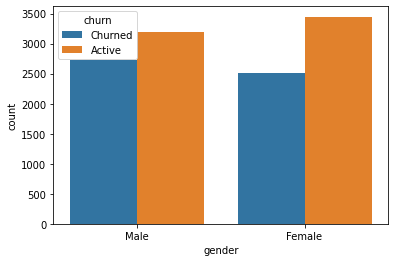

In [5]:
sns.countplot(x='gender',data=df,hue='churn')

<AxesSubplot:xlabel='region', ylabel='count'>

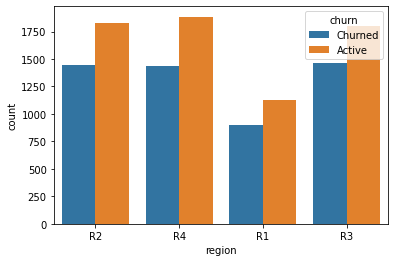

In [6]:
sns.countplot(x='region',data=df,hue='churn')

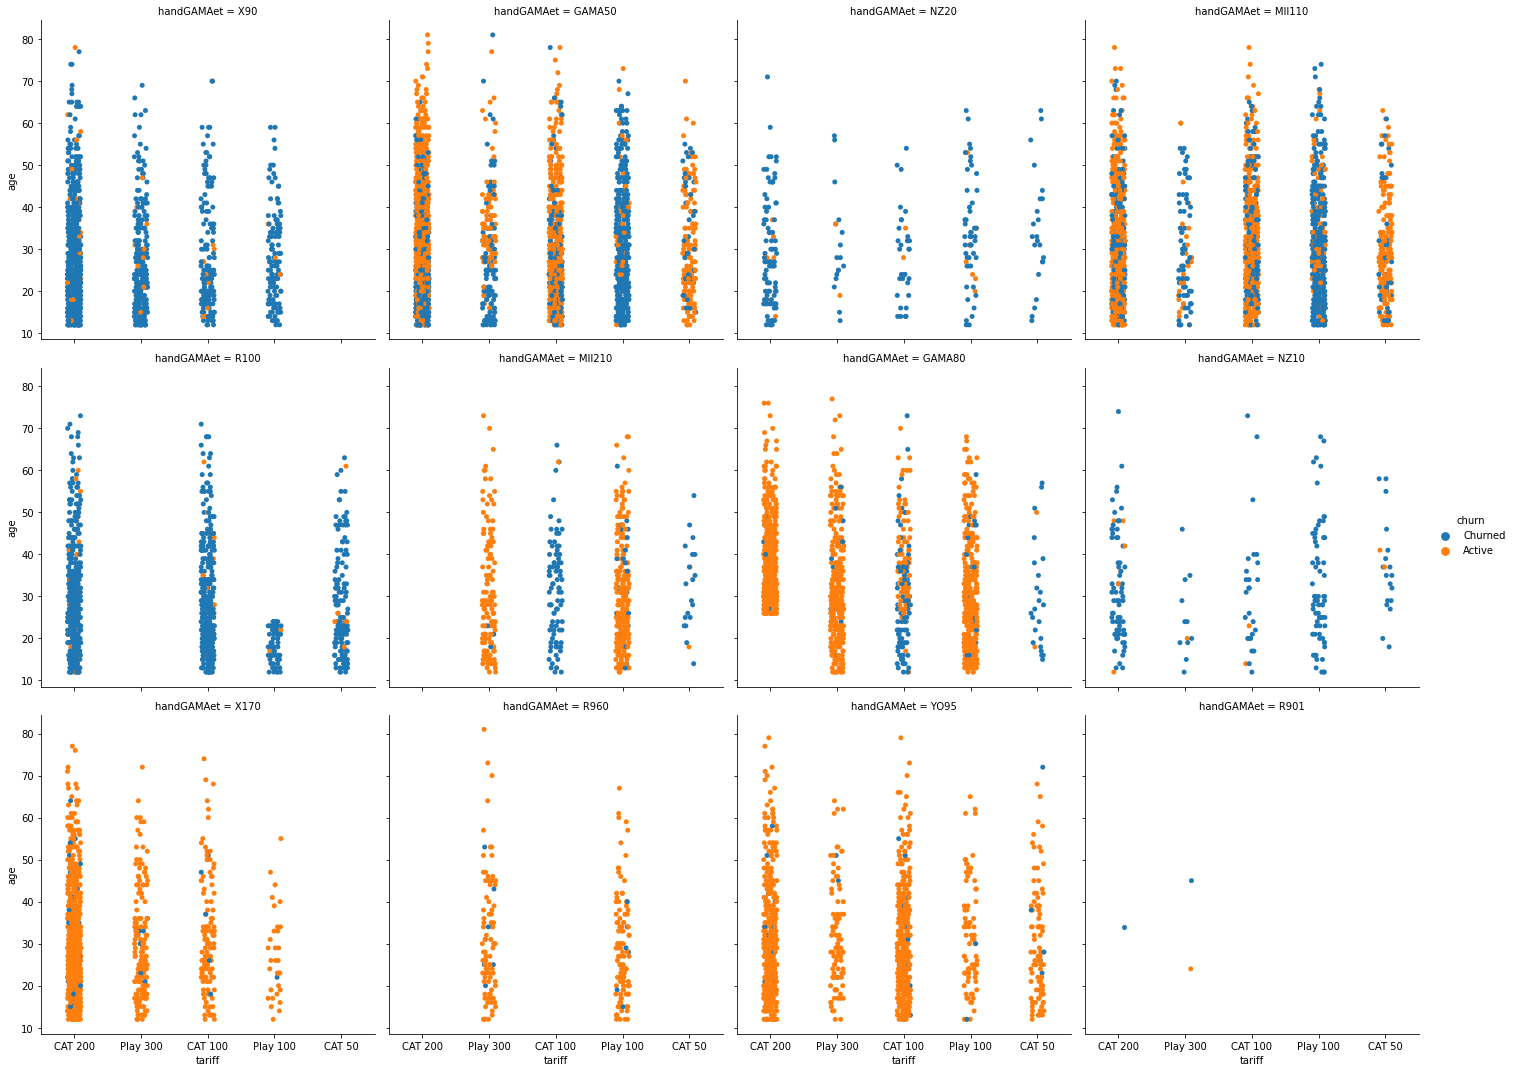

In [7]:
sns.catplot(x='tariff',y='age',data=df,hue='churn',col='handGAMAet',col_wrap=4)

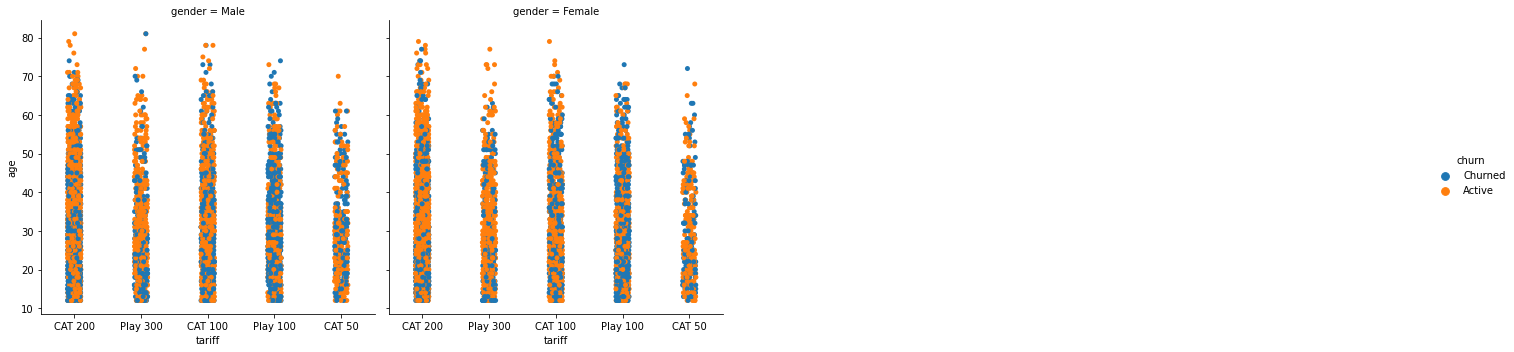

In [8]:
sns.catplot(x='tariff',y='age',data=df,hue='churn',col='gender',col_wrap=4)

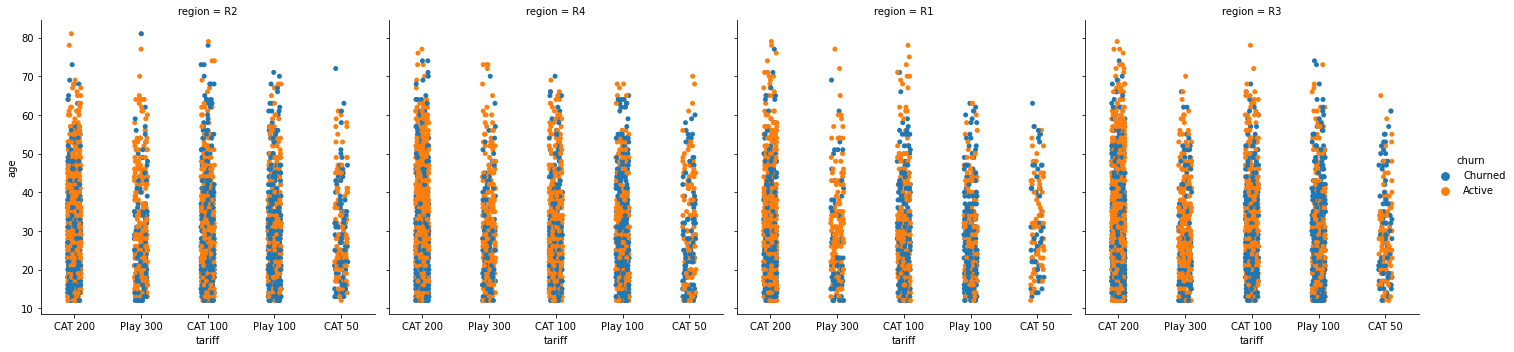

In [9]:
sns.catplot(x='tariff',y='age',data=df,hue='churn',col='region',col_wrap=4)

In [10]:
df.head()

,customer_id,gender,age,postalcode,region,connect_date,end_date,dropped_calls,pay method,tariff,handGAMAet,churn
0,AP173350,Male,15,3590,R2,2014-01-01,2016-04-14,0,Prepaid,CAT 200,X90,Churned
1,AP417050,Male,33,8048,R4,2014-02-01,2016-12-20,15,Prepaid,Play 300,GAMA50,Churned
2,AP398340,Female,17,8723,R4,2014-03-01,2016-04-24,13,Prepaid,CAT 100,GAMA50,Churned
3,AP409260,Male,27,8569,R4,2014-03-01,2016-09-08,15,Prepaid,CAT 200,NZ20,Churned
4,AP384030,Female,27,1150,R1,2014-04-01,2016-01-06,0,Prepaid,Play 100,X90,Churned


In [11]:
from sklearn import preprocessing

In [12]:
label_encoder=preprocessing.LabelEncoder()

In [13]:
df['region']=label_encoder.fit_transform(df['region'])
df['gender']=label_encoder.fit_transform(df['gender'])
df['tariff']=label_encoder.fit_transform(df['tariff'])
df['handGAMAet']=label_encoder.fit_transform(df['handGAMAet'])
df['churn']=label_encoder.fit_transform(df['churn'])
df

,customer_id,gender,age,postalcode,region,connect_date,end_date,dropped_calls,pay method,tariff,handGAMAet,churn
0,AP173350,1,15,3590,1,2014-01-01,2016-04-14,0,Prepaid,1,10,1
1,AP417050,1,33,8048,3,2014-02-01,2016-12-20,15,Prepaid,4,0,1
2,AP398340,0,17,8723,3,2014-03-01,2016-04-24,13,Prepaid,0,0,1
3,AP409260,1,27,8569,3,2014-03-01,2016-09-08,15,Prepaid,1,5,1
4,AP384030,0,27,1150,0,2014-04-01,2016-01-06,0,Prepaid,3,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11877,AP239500,0,35,4051,1,2016-09-28,2017-08-09,2,Prepaid,3,0,1
11878,AP242570,0,12,8623,3,2016-09-28,2017-08-17,1,Prepaid,4,0,1
11879,AP261950,0,35,9520,3,2016-09-28,NaT,2,Prepaid,3,1,0
11880,AP357200,0,29,7143,2,2016-09-28,NaT,6,Prepaid,1,11,0


In [14]:
x=df[['gender','age','region','tariff','handGAMAet']]
y=df[['churn']]

In [15]:
from sklearn import linear_model

In [16]:
model=linear_model.LogisticRegression()

In [17]:
model.fit(x,y)

C:\Users\RAGHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
model.score(x,y)

0.5755765022723447

In [19]:
from sklearn import tree

In [20]:
model=tree.DecisionTreeClassifier()

In [21]:
model.fit(x,y)

DecisionTreeClassifier()

In [22]:
model.score(x,y)

0.9221511530045446

In [23]:
from sklearn import ensemble

In [24]:
model=ensemble.RandomForestClassifier(n_estimators=40)

In [25]:
model.fit(x,y)

C:\Users\RAGHAV\AppData\Local\Temp/ipykernel_1712/1265173374.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


RandomForestClassifier(n_estimators=40)

In [26]:
model.score(x,y)

0.9218986702575324

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
model=GaussianNB()

In [29]:
model.fit(x,y)

C:\Users\RAGHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [30]:
model.score(x,y)

0.5978791449250968

In [31]:
model=tree.DecisionTreeClassifier()

In [32]:
model.fit(x,y)

DecisionTreeClassifier()

In [33]:
model.score(x,y)

0.9221511530045446

In [34]:
x.head()

,gender,age,region,tariff,handGAMAet
0,1,15,1,1,10
1,1,33,3,4,0
2,0,17,3,0,0
3,1,27,3,1,5
4,0,27,0,3,10


In [35]:
model.predict([[1,30,0,1,0]])

C:\Users\RAGHAV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])